# RS_PROJECT:

#### DOMAIN: 

Smartphone, Electronics

#### CONTEXT:

India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India 
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

#### DATA DESCRIPTION: 

• Author : name of the person who gave the rating
• Country : country the person who gave the rating belongs to
• Data : date of the rating
• Domain: website from which the rating was taken from
• Extract: rating content
• Language: language in which the rating was given
• Product: name of the product/mobile phone for which the rating was given
• Score: average rating for the phone
• Score_max: highest rating given for the phone
• Source: source from where the rating was taken

#### PROJECT OBJECTIVE: 

We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.

### 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

#### SCIKIT-SURPRISE was not supported by higher python packages like 3.9. 

#### So python version 3.8 is used by me.

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
import pandas as pd
import numpy as np

In [2]:
from platform import python_version
print(python_version())

3.8.8


In [3]:
!pip install scikit-surprise

In [4]:
!pip install plotly

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [6]:
!pip install translate
!pip install google-trans-new

In [7]:
from google_trans_new import google_translator
from translate import Translator
import warnings
warnings.filterwarnings('ignore')

In [8]:
pd.set_option("display.max_rows", 50, "display.max_columns", 50)
pd.set_option('display.max_colwidth', None)
plt.style.use('bmh')
# create contants
RS=612

#### 1.A. Merge all the provided CSVs into one dataFrame.

In [9]:
# Loading all the datasets:

review_file_1 = pd.read_csv('C:\\Users\\ASUS\\Data Set\\Data Set\\phone_user_review_file_1.csv', encoding='iso-8859-1')
review_file_1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,"As a diehard Samsung fan who has had every Samsung phone since before the S series started, this has been my favorite upgrade so far. I am amazed at some of the reviews and think people may just have a defective device that needs to be replaced. The battery life is amazing.",CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth and beautiful I highly recommend the phone you will not regret getting this phone.,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sluggish for the few apps that I have installed. Samsung wants to vacuum all of your data with their apps that requires more access than needed. What else is new.,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unlocked (GSM + CDMA, US WARRANTY) (Orchid Gray)"
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,"Never disappointed. One of the reasons I've been a long Samsung (product) consumer, they're ability to impress me with each product release. I've owned, or maintained, all Samsung smartphones starting with the S4 and the S8 is the best one yet.",Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people that have carried their phone in their pocket without problems until the S8. Day one screen has crack from being in my pocket. Bluetooth on my 1st trip struggles to stay connected. Good news.....battery life is great and lots of great features.,S Ate Mine,Samsung Galaxy S8


#### The 6 datasets are read and the shape of the datasets are printed below:

In [10]:
review_file_1 = pd.read_csv('C:\\Users\\ASUS\\Data Set\\Data Set\\phone_user_review_file_1.csv', encoding='iso-8859-1')
review_file_2 = pd.read_csv('C:\\Users\\ASUS\\Data Set\\Data Set\\phone_user_review_file_2.csv', encoding='iso-8859-1')
review_file_3 = pd.read_csv('C:\\Users\\ASUS\\Data Set\\Data Set\\phone_user_review_file_3.csv', encoding='iso-8859-1')
review_file_4 = pd.read_csv('C:\\Users\\ASUS\\Data Set\\Data Set\\phone_user_review_file_4.csv', encoding='iso-8859-1')
review_file_5 = pd.read_csv('C:\\Users\\ASUS\\Data Set\\Data Set\\phone_user_review_file_5.csv', encoding='iso-8859-1')
review_file_6 = pd.read_csv('C:\\Users\\ASUS\\Data Set\\Data Set\\phone_user_review_file_6.csv', encoding='iso-8859-1')

In [11]:
print('The shape of the dataset:\n',review_file_1.shape)
print('The shape of the dataset:\n',review_file_2.shape)
print('The shape of the dataset:\n',review_file_3.shape)
print('The shape of the dataset:\n',review_file_4.shape)
print('The shape of the dataset:\n',review_file_5.shape)
print('The shape of the dataset:\n',review_file_6.shape)

The shape of the dataset:
 (374910, 11)
The shape of the dataset:
 (114925, 11)
The shape of the dataset:
 (312961, 11)
The shape of the dataset:
 (98284, 11)
The shape of the dataset:
 (350216, 11)
The shape of the dataset:
 (163837, 11)


In [12]:
df = pd.concat([review_file_1,review_file_2,review_file_3,review_file_4,review_file_5,review_file_6], ignore_index=True)
del review_file_1, review_file_2, review_file_3, review_file_4, review_file_5, review_file_6
print(f'The Shape of the final dataset: Rows: {df.shape[0]} and Columns: {df.shape[1]}\n')
print('Top 5 rows of the data: ')
display(df.head())
print('Bottom 5 rows of the data: ')
display(df.tail())

The Shape of the final dataset: Rows: 1415133 and Columns: 11

Top 5 rows of the data: 


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,"As a diehard Samsung fan who has had every Samsung phone since before the S series started, this has been my favorite upgrade so far. I am amazed at some of the reviews and think people may just have a defective device that needs to be replaced. The battery life is amazing.",CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth and beautiful I highly recommend the phone you will not regret getting this phone.,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sluggish for the few apps that I have installed. Samsung wants to vacuum all of your data with their apps that requires more access than needed. What else is new.,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unlocked (GSM + CDMA, US WARRANTY) (Orchid Gray)"
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,"Never disappointed. One of the reasons I've been a long Samsung (product) consumer, they're ability to impress me with each product release. I've owned, or maintained, all Samsung smartphones starting with the S4 and the S8 is the best one yet.",Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people that have carried their phone in their pocket without problems until the S8. Day one screen has crack from being in my pocket. Bluetooth on my 1st trip struggles to stay connected. Good news.....battery life is great and lots of great features.,S Ate Mine,Samsung Galaxy S8


Bottom 5 rows of the data: 


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1415128,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,"Weil mein Onkel bei ALcatel arbeitet habe ich ihn natÃ¼rlich auch einmal gefragt, was fÃ¼r ein Handy er hat. Darauf bekam ich die Antwort: ""Ein SIEMENS-Handy"". Das ist natÃ¼rlich schon ein bisschen komisch, finde ich zumindest.",david.paul,Alcatel Club Plus Handy
1415129,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ein paar Monaten ein Alcatel!! Und ich finde es nicht schlecht die TÃ¶ne sind auch recht gut und man muss sich ja nicht so ein teures kaufen es reicht das genauso!!! Ich finde die Tasten eignen sich gut zum sms schreiben und sind auch so recht ok!!,Christiane14,Alcatel Club Plus Handy
1415130,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen was super gutes.Aber auch dieses Mal hat es nicht geklappt. Dieses Handy ist zwar auch ein Dual-Band-Handy,aber das ist auch das einzig gute daran.Von der Form ist es fÃ¼rchterlich anzusehen und auch von schwarz auf silber hat keine groÃe VerÃ¤nderung...",michaelawr,Alcatel Club Plus Handy
1415131,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,"Ich bin seit 2 Jahren (stolzer) Besitzer eines alcatel one touch club+. Im Grossen und Ganzen bin ich echt zufrieden.....einfache MenÃ¼fÃ¼hrung, keine sinnlosen Spielerein (tetris...) und - was mich persÃ¶nlich am meisten beeindruckt - Ã¤uÃerst stabil.",claudia0815,Alcatel Club Plus Handy
1415132,/cellphones/alcatel-ot-club_1187/,4/25/2000,de,de,Ciao,ciao.de,2.0,10.0,"Was sich Alkatel hier wieder ausgedacht hat,schlÃ¤gt wohl auch nicht gerade ein.Das Alkatel hat eine tozal hÃ¤Ãliche Form.Auch das nun die Oberschale nicht mehr schwarz sondern silber ist,verbessert das Aussehen auch nicht sehr viel zum positiven.Dieses Handy hat ein Gewicht von 150 g.Die...",michaelawr,Alcatel Club Plus Handy


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


#### 1. B. Explore, understand the Data and share at least 2 observations

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


Except score and score_max are of float type and all other features are of object type.

The 'date' feature should be of datetype.

Also, score, score_max, extract and author: columns seems to have Null values.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


Since only the score and score_max columns are of float type. All the mean, standard deviation and minimum and max values are seen as above. 

In [16]:
df1 = df.isna().sum().round(2)
df2 = (df1*100/df.shape[0]).round(2)
print('Missing count and percentages for each column are: \n',df1.astype('str') +' ('+ df2.astype('str')+'%)')
del df1, df2

Missing count and percentages for each column are: 
 phone_url         0 (0.0%)
date              0 (0.0%)
lang              0 (0.0%)
country           0 (0.0%)
source            0 (0.0%)
domain            0 (0.0%)
score        63489 (4.49%)
score_max    63489 (4.49%)
extract      19361 (1.37%)
author       63202 (4.47%)
product           1 (0.0%)
dtype: object


Thus, 3 features such as score, score_max and author have approx 4.5% missing values.

And 'score' and 'score_max' have exactly same number of missing values.

#### To find the unique values:

In [17]:
print('Number of unique values in each feature: \n',df.nunique())

Number of unique values in each feature: 
 phone_url       5556
date            7728
lang              22
country           42
source           331
domain           384
score             86
score_max          1
extract      1321353
author        801103
product        61313
dtype: int64


In [18]:
df['product'].shape

(1415133,)

In [19]:
unknown = ['Anonymous','einer Kundin','einem Kunden', 'unknown','Anonymous ']
df['author'].replace(to_replace = unknown, 
                          value = 'Anonymous', 
                          inplace=True)

In [20]:
# Let's check the score column of the data

print('Unique values in the "score" feature: \n',df.score.unique())

Unique values in the "score" feature: 
 [10.   6.   9.2  4.   8.   2.   9.6  7.2  6.8  9.   8.3  8.8  8.4  5.3
  7.   6.4  7.6  nan  5.2  3.2  4.4  2.8  5.6  3.6  4.8  1.   5.   3.
  2.4  9.3  8.5  9.5  6.5  5.5  9.8  8.2  8.6  7.8  9.4  6.6  6.2  7.5
  9.9  2.7  8.7  6.7  3.3  7.7  7.3  9.7  6.3  7.4  5.7  4.7  4.3  5.8
  4.2  4.5  2.2  5.4  7.9  3.5  4.6  3.7  2.5  3.4  7.1  8.1  1.2  1.4
  3.8  9.1  2.6  1.6  1.7  1.5  1.8  2.3  6.1  5.9  1.3  0.2  0.4  8.9
  6.9  0.6  4.9]


We need to round it off to the nearest integer.

In [21]:
relevant_features=['author','product','score']

# irrelvant_features=['phone_url','date','lang','country','source','domain','score_max','extract']

In [22]:
print('Number of duplicate rows: ', df.duplicated().sum())

Number of duplicate rows:  6412


In [23]:
original_rows = df.shape[0]
original_columns = df.shape[1]

####  C. Round off scores to the nearest integers. 

#### G. Drop irrelevant features. Keep features like Author, Product, and Score.

In [24]:
df3 = df.copy()

# Delete data which is not useful anymore, to save memory
del df

# Step1: remove irrelevant features
df3 = df3.loc[:,relevant_features]
print(f'Step1: df3 Shape after removing irrelevant features: Rows: {df3.shape[0]} and Columns: {df3.shape[1]}\n')

# Step2: Round-off score feature to nearest integer
df3['score'] = df3['score'].round(0).astype('Int64')
print('Step2: Round-off: Unique values in the "score" feature(after rounding-off): \n',list(df3.score.unique()))

Step1: df3 Shape after removing irrelevant features: Rows: 1415133 and Columns: 3

Step2: Round-off: Unique values in the "score" feature(after rounding-off): 
 [10, 6, 9, 4, 8, 2, 7, 5, <NA>, 3, 1, 0]


The scores feature is rounded off to the nearest numbers.

The irrelevant features are removed.

#### D. Check for missing values. Impute the missing values, if any. 

In [25]:
# Step3: Impute missing values in score feature with median
df3['score'] = df3['score'].fillna(df3['score'].median())
print('\nStep3: Imputation of "score"  with median and "author" with "Anonymous"')


Step3: Imputation of "score"  with median and "author" with "Anonymous"


The score feature is imputed with median values.

#### E. Check for duplicate values and remove them, if any. 

In [26]:
# Step4: remove samples with missing values in 'Product' and 'author' feature and also 'Anonymous' values
df3.dropna(inplace=True)
df3 = df3[df3["author"] != 'Anonymous']
print(f'\nStep4: df3 Shape(after removing missing values): Rows: {df3.shape[0]} and Columns: {df3.shape[1]}\n')

# Step5: remove duplicates, if any
df3 = df3.drop_duplicates()
print(f'Step5: df3 Shape(after removing duplicates): Rows: {df3.shape[0]} and Columns: {df3.shape[1]}\n')

print(f'Overall {round(100 - df3.shape[0]*100/original_rows,2)}% samples are dropped\n')
df3.head()


Step4: df3 Shape(after removing missing values): Rows: 1341474 and Columns: 3

Step5: df3 Shape(after removing duplicates): Rows: 1211516 and Columns: 3

Overall 14.39% samples are dropped



,author,product,score
0,CarolAnn35,Samsung Galaxy S8,10
1,james0923,Samsung Galaxy S8,10
2,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unlocked (GSM + CDMA, US WARRANTY) (Orchid Gray)",6
3,Buster2020,Samsung Galaxy S8 64GB (AT&T),9
4,S Ate Mine,Samsung Galaxy S8,4


Duplicate values are removed.

#### F. Keep only 1 Million data samples. Use random state=612

In [27]:
# separate 1 million data samples

df3_1m = df3.sample(n=1000000, random_state=RS)
print(f'df3_1m Shape: Rows: {df3_1m.shape[0]} and Columns: {df3_1m.shape[1]}\n')

df3_1m Shape: Rows: 1000000 and Columns: 3



### 2. Answer the following questions.

#### 2.A. Identify the most rated products.

In [28]:
print('Most rated features/products: \n\n',df3_1m['product'].value_counts().head())

Most rated features/products: 

 OnePlus 3 (Graphite, 64 GB)          1835
Lenovo Vibe K4 Note (White,16GB)     1737
Lenovo Vibe K4 Note (Black, 16GB)    1520
Samsung Galaxy J3 (8GB)              1500
Nokia N95                            1496
Name: product, dtype: int64


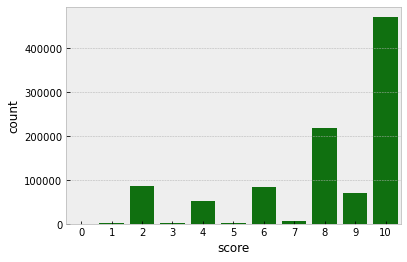

In [29]:
sns.countplot(data=df3_1m , x='score',color='green')
plt.show()

#### 2.B. Identify the users with most number of reviews.

In [30]:
print('Users with highest number of reviews: \n\n',df3_1m['author'].value_counts().head())

Users with highest number of reviews: 

 Amazon Customer    13873
Cliente Amazon      5263
Client d'Amazon     2238
Amazon Kunde        1666
David                762
Name: author, dtype: int64


Amazon customers are those with highest number of reviews.

#### 2.C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset. 

In [31]:
Author50 = df3['author'].value_counts()
Author50 = Author50[Author50>50].index.tolist() # list of authors with > 50 ratings
print('Number of authors who have given >50 rating: ', len(Author50))

Product50 = df3['product'].value_counts()
Product50 = Product50[Product50>50].index.tolist() # list of products with > 50 ratings
print('Number of products with >50 rating: ', len(Product50))

df_50 = df3[(df3['author'].isin(Author50)) & (df3['product'].isin(Product50))]
print(f'\ndf_50: Rows: {df_50.shape[0]} and Columns: {df_50.shape[1]}\n')
del Author50, Product50
df_50.head()

Number of authors who have given >50 rating:  867
Number of products with >50 rating:  5766

df_50: Rows: 69390 and Columns: 3



,author,product,score
253,Ralf,Samsung Galaxy S8 Zwart,10
271,ÐÐ³Ð¾Ñ,Samsung Galaxy S8,10
272,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Samsung Galaxy S8,10
273,ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ,Samsung Galaxy S8,10
275,Ð¡ÐµÑÐ³ÐµÐ¹,Samsung Galaxy S8,8


#### The shape of the dataset with more than 50 ratings of users and products:

In [32]:
print(df_50.shape)

(69390, 3)


### 3. Build a popularity based model and recommend top 5 mobile phones. 

### Model for recommend top 5 mobile phones from the data with products having more than 50 ratings and users who have given more than 50 ratings.

In [33]:
def popularity_rec(data):
    ratings_mean_count = pd.DataFrame(data.groupby('product')['score'].mean())
    ratings_mean_count['rating_counts'] = data.groupby('product')['score'].count()
    ratings_mean_count = ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False])
    print('Top 5 recommendations for the products from the data are: \n')
    display(ratings_mean_count.head())
    return

In [34]:
popularity_rec(df_50)

Top 5 recommendations for the products from the data are: 



,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,34
Sim Free Samsung Galaxy S6 Edge Mobile Phone - Gold,10.0,11
Samsung N7100 Galaxy Note II (16Gb),10.0,10
"Lenovo Motorola RAZR HD Smartphone (11,9 cm (4,7 Zoll) AMOLED, Dual-Core, 1,5GHz, 1GB RAM, 8 Megapixel Kamera, Android 4.0) schwarz",10.0,9
Motorola Defy,10.0,9


### If we consider the original data (excluding 'Anonymous' users)

In [35]:
popularity_rec(df3)

Top 5 recommendations for the products from the data are: 



,score,rating_counts
product,,
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,186
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,173
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,171
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,170
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.0,158


## 4. Build a collaborative filtering model using SVD. 

### You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). 

### Build a collaborative filtering model using kNNWithMeans from surprise. 

### You can try both user-based and item-based model.

In [36]:
df50_ = Dataset.load_from_df(df_50[['author','product','score']], Reader(rating_scale=(1, 10)))
trainset, testset = train_test_split(df50_, test_size=.25,random_state=RS)

print('Top Three Values from Trainset: \n')
for key,value in {k: v for k, v in trainset.ur.items() if k <= 2}.items(): print(key,'-> ',value,'\n')
print('\nTop Three Values from Testset: ', *testset[0:3], sep='\n\n')

Top Three Values from Trainset: 

0 ->  [(0, 10.0), (29, 9.0), (388, 9.0), (797, 10.0), (170, 8.0), (960, 10.0), (983, 8.0), (1146, 10.0), (999, 9.0), (1239, 8.0), (478, 9.0), (1743, 6.0), (651, 10.0), (1877, 6.0), (1630, 10.0), (1419, 8.0), (735, 10.0), (2143, 6.0), (259, 5.0), (2170, 10.0), (1744, 7.0), (123, 10.0), (1604, 10.0), (264, 10.0), (361, 8.0), (903, 8.0), (195, 9.0), (651, 5.0), (1540, 10.0), (2624, 9.0), (195, 7.0), (1832, 6.0), (244, 5.0), (34, 9.0), (607, 10.0), (837, 7.0), (134, 9.0), (80, 10.0), (999, 10.0), (195, 8.0), (2143, 8.0), (1218, 8.0), (116, 9.0), (1447, 10.0), (492, 10.0), (3032, 9.0), (1389, 9.0), (2666, 9.0), (232, 9.0), (691, 6.0), (1972, 10.0), (1064, 2.0), (402, 9.0), (954, 7.0), (837, 9.0), (953, 10.0), (2545, 10.0), (1620, 2.0), (836, 5.0), (1494, 9.0), (1260, 7.0), (3983, 8.0), (1294, 10.0), (691, 8.0), (960, 8.0), (681, 7.0), (478, 5.0), (1972, 9.0), (3984, 4.0), (63, 8.0), (217, 2.0), (170, 9.0), (2501, 9.0), (1042, 10.0), (98, 9.0), (2523, 6.0), 

In [37]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [38]:
def svd_func(train, test):
    svd = SVD(random_state=RS)
    svd.fit(train)
    svd_pred = svd.test(test)
    return svd_pred, svd

svd_pred, svd = svd_func(trainset,testset)
print('First few prediction values: \n',svd_pred[0:2])
print('\nRMSE value(test-set): ',round(accuracy.rmse(svd_pred),2),'\n') # compute RMSE
svd_rmse = round(accuracy.rmse(svd_pred),2)

First few prediction values: 
 [Prediction(uid='Charlie', iid='Samsung Galaxy S7 EDGE Smartphone (5,5 Zoll (13,9 cm) Touch-Display, 32GB interner Speicher, Android OS) weiÃ\x9f', r_ui=10.0, est=7.16565157980762, details={'was_impossible': False}), Prediction(uid='Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', iid='Sony Xperia Z1 (Ñ\x84Ð¸Ð¾Ð»ÐµÑ\x82Ð¾Ð²Ñ\x8bÐ¹)', r_ui=9.0, est=8.96643689361988, details={'was_impossible': False})]
RMSE: 2.8266

RMSE value(test-set):  2.83 

RMSE: 2.8266


SVD Model has RMSE of 2.83.

## 4.2 Collaborative filtering model using kNNWithMeans_Item based

In [39]:
def knn_item(train, test):
    knn_i = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
    knn_i.fit(train)
    knn_i_pred = knn_i.test(test)
    return knn_i_pred, knn_i

knn_i_pred, knn_i = knn_item(trainset, testset)
print('First few prediction values: \n',knn_i_pred[0:2])
print('\nRMSE value(Item-based Model, test-set): ',round(accuracy.rmse(knn_i_pred),2),'\n') # compute RMSE
knn_i_rmse = round(accuracy.rmse(knn_i_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Charlie', iid='Samsung Galaxy S7 EDGE Smartphone (5,5 Zoll (13,9 cm) Touch-Display, 32GB interner Speicher, Android OS) weiÃ\x9f', r_ui=10.0, est=6.083201920186374, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid='Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', iid='Sony Xperia Z1 (Ñ\x84Ð¸Ð¾Ð»ÐµÑ\x82Ð¾Ð²Ñ\x8bÐ¹)', r_ui=9.0, est=8.464733638538034, details={'actual_k': 50, 'was_impossible': False})]
RMSE: 2.9563

RMSE value(Item-based Model, test-set):  2.96 

RMSE: 2.9563


RMSE Value of Itembased KNN-model is 3.

## 4.3. Collaborative filtering model using kNNWithMeans_User based

In [40]:
def knn_user(train, test):
    knn_u = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
    knn_u.fit(train)
    knn_u_pred = knn_u.test(test)
    return knn_u_pred, knn_u

knn_u_pred, knn_u = knn_user(trainset, testset)
print('First few prediction values: \n',knn_u_pred[0:2])
print('\nRMSE value(User-based Model, test-set): ',round(accuracy.rmse(knn_u_pred),2),'\n') # compute RMSE
knn_u_rmse = round(accuracy.rmse(knn_u_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Charlie', iid='Samsung Galaxy S7 EDGE Smartphone (5,5 Zoll (13,9 cm) Touch-Display, 32GB interner Speicher, Android OS) weiÃ\x9f', r_ui=10.0, est=3.4304038686146336, details={'actual_k': 1, 'was_impossible': False}), Prediction(uid='Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', iid='Sony Xperia Z1 (Ñ\x84Ð¸Ð¾Ð»ÐµÑ\x82Ð¾Ð²Ñ\x8bÐ¹)', r_ui=9.0, est=8.443648912765289, details={'actual_k': 33, 'was_impossible': False})]
RMSE: 3.0990

RMSE value(User-based Model, test-set):  3.1 

RMSE: 3.0990


RMSE Value of User_based KNN-model is 3.10 .

# 5. Evaluate the collaborative model. Print RMSE value. 

<AxesSubplot:>

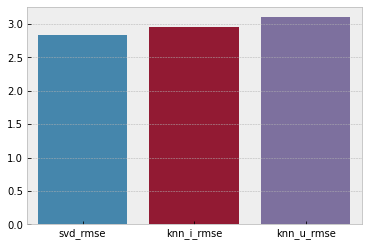

In [41]:
sns.barplot(x=['svd_rmse','knn_i_rmse', 'knn_u_rmse'],y=[svd_rmse,knn_i_rmse, knn_u_rmse])

#### Best RMSE score is given by KNN (Item_Based) Model.

# 6. Predict score (average rating) for test users

In [42]:
svd_pred_df=pd.DataFrame(svd_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('Average prediction for test users: ',svd_pred_df['est'].mean())
print('Average rating  by test users: ',svd_pred_df['rui'].mean())
print('Average prediction error for test users: ',(svd_pred_df['rui']-svd_pred_df['est']).abs().mean())

Average prediction for test users:  7.861755418823028
Average rating  by test users:  7.8795250172930595
Average prediction error for test users:  2.2092044909724247


In [43]:
knn_i_pred_df=pd.DataFrame(knn_i_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('Average prediction for test users: ',knn_i_pred_df['est'].mean())
print('Average rating  by test users: ',knn_i_pred_df['rui'].mean())
print('Average prediction error for test users: ',(knn_i_pred_df['rui']-knn_i_pred_df['est']).abs().mean())

Average prediction for test users:  7.789083268239425
Average rating  by test users:  7.8795250172930595
Average prediction error for test users:  2.268677092125081


In [44]:
knn_u_pred_df=pd.DataFrame(knn_u_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('Average prediction for test users: ',knn_u_pred_df['est'].mean())
print('Average rating  by test users: ',knn_u_pred_df['rui'].mean())
print('Average prediction error for test users: ',(knn_u_pred_df['rui']-knn_u_pred_df['est']).abs().mean())

Average prediction for test users:  7.819963163024206
Average rating  by test users:  7.8795250172930595
Average prediction error for test users:  2.330539939799806


# 7. Report your findings and inferences.

1. Most popular phone (rated 10 by highest number of people):

Samsung Galaxy Note5

Sim Free Samsung Galaxy S6 Edge Mobile Phone - Gold	  


2. Overall data is highly skewed towards 'Amazon customers' from different countries. This may also be because 'Amazon' is the biggest trader for phones in the world. Although correct 'user' names from 'Amazon' should have used.


3. Most of the authors have given the rating of '10' or '8'


4. Both knn_i(item-based) and knn_u(user-based) have roughly similar RMSE

# 8. Try and recommend top 5 products for test users. 

In [45]:
top_5 = get_top_n(knn_i_pred,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_5.items(): print(key,'-> ',value,'\n')

Top 5 recommendations for all test users are: 

Charlie ->  [('Samsung Galaxy Note 3 Region Locked Smartphone - White', 10), ('Samsung Galaxy Q | Black', 10), ('Apple iPhone 3GS 8GB Black Factory Unlocked / Not Jailbroken', 9.28160234547436), ('Sim Free Motorola Moto G 4th Generation Mobile Phone - Black', 9.171015338939883), ('APPLE iPhone 7 - Silver, 32 GB', 9.096071683899764)] 

ÐÐ»ÐµÐºÑÐµÐ¹ ->  [('Samsung i9100 Galaxy S II', 10), ('Samsung Galaxy J5', 10), ('HTC Wildfire S (Black)', 9.93410239447772), ('Samsung Galaxy A5', 9.809729412327322), ('Sony Xperia ZR (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)', 9.73769353053554)] 

Amazon Customer ->  [('Motorola Nexus 6 Unlocked Cellphone, 64GB, Cloud White (U.S. Warranty) (Discontinued by Manufacturer)', 10), ('Samsung Korea Galaxy S5 SM-G900F 4G LTE 16GB Factory Unlocked International Version Cell Phone - Retail Packaging - White', 10), ('LG myTouch Q C800 GSM Android Slider Phone - Black/Grey', 10), ('Samsung GT-B2710, Dust and Water Resistant Unlocked

Alessio ->  [('Lenovo Motorola Moto G LTE Smartphone, Display 4.5", Fotocamera 5 MP, Memoria 8 GB, Quad-Core 1.2 GHz, 1 GB RAM, Micro SD, Android 4.4.3, Bianco [Italia]', 9.624757080670355), ('Lenovo Motorola Moto X 2a Generazione Smartphone, Memoria 16 GB, 2 GB RAM, 4G/LTE, Wi-Fi, Nero Resina [Italia]', 9.368529791576007), ('Asus ZenFone 3 Smartphone, Memoria Interna da 64 GB, Dual-SIM, Bianco [Italia]', 9.25651324409162), ('LG G4 Smartphone Display IPS 5.5" QHD, Fotocamera 16 MP, Memoria Interna 32 GB, 3 GB RAM, Colore Nero', 9.206320665948812), ('Samsung J710 Galaxy J7 Smartphone da 16 GB, Nero [Italia]', 9.196424127512122)] 

ÐÐ°ÑÑ ->  [('Sony Xperia J (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)', 9.50790202847483), ('Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80Ñ\x8bÐ¹ ÐºÐ¾Ñ\x81Ð¼Ð¾Ñ\x81)', 9.355370896415469), ('Sony Xperia Z1 (Ð±ÐµÐ»Ñ\x8bÐ¹)', 9.001316603535397), ('Sony Xperia Z1 (Ñ\x84Ð¸Ð¾Ð»ÐµÑ\x82Ð¾Ð²Ñ\x8bÐ¹)', 8.983777430005858), ('Ð¡Ð¾Ñ\x82Ð¾Ð²Ñ\x8bÐ¹ Ñ\x82ÐµÐ»ÐµÑ\x84Ð¾Ð½ ASUS ZenFone 2 Deluxe Special E

Nico ->  [('LG Nexus 5 Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 16 Go - Android 4.4 KitKat) Noir', 9.93009568809386), ('HTC One X+ Smartphone (11,9 cm (4,7 Zoll) Touchscreen, NVIDIA Tegra 3, 8 Megapixel Kamera, 64 GB, 1,7 GHz Quad-Core Prozessor, Android 4.1 OS) schwarz', 9.193478893352092), ('Lenovo Motorola Moto G LTE Smartphone, Display 4.5", Fotocamera 5 MP, Memoria 8 GB, Quad-Core 1.2 GHz, 1 GB RAM, Micro SD, Android 4.4.3, Bianco [Italia]', 8.98526609421603), ('Sony Xperia Z5 goud / 32 GB', 8.606495651354969), ('Samsung SGH-U600', 8.03472140178874)] 

Jo ->  [('Blackberry Z10 Smartphone (4,2 Zoll Display, Touchscreen, 8 Megapixel Kamera, 16 GB erweiterbarer Speicher, 4G LTE) weiss', 10), ('Sim Free Apple iPhone 5S 16GB Mobile Phone - Space Grey', 9.491232825182985), ('HTC Wildfire S Black', 9.242547441762715), ('Huawei Ascend P6 Smartphone (11,9 cm (4,7 Zoll) Touchscreen, 8 Megapixel, 8GB Speicher, Android 4.2) schwarz', 8.515412754933452), ('Huawei P8 lite Smartphone, Display

Monica ->  [('Alcatel Onetouch 2004G - MÃ³vil libre (pantalla 2.4", 512 MB RAM, teclas grandes), blanco', 9.97197387021583), ('Alcatel One Touch 997D Dual SIM, Display 4.3 Pollici, Wi-Fi, Bianco', 9.851353527530165), ('Motorola Moto G 4G SIM-Free Smartphone - Black (8GB) - Discontinued by manufacturer', 9.823589048916809), ('BlackBerry 8520 Unlocked Phone with 2 MP Camera, Bluetooth, Wi-Fi--International Version with No Warranty (Black)', 9.76847997937335), ('Samsung Galaxy S4 4G', 8.808695652173911)] 

Lucas ->  [('LG Optimus L9 Unlocked GSM 4.5" Touch Screen w/ 5MP Camera - Black', 10), ('Honor 6 4G UK Smartphone (5 inch, Touchscreen, Octa-Core, 3GB RAM, 16GB ROM, 13MP rear camera, 5MP front camera, LTE CAT6, Android 4.4, Emotion UI 2.3) White', 9.87393056711825), ('Huawei Ascend D1', 9.6), ('TUDIA ZenFone 3 ZE552KL Case, TUDIA Ultra Slim Full-Matte Lightweight [ARCH] TPU Bumper Shock Absorption Case for ASUS ZenFone 3 ZE552KL (5.5 inch) (Gray)', 9.307844818272727), ('HTC Sensation X

ÐÐºÑÐ°Ð½Ð° ->  [('Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80Ñ\x8bÐ¹ ÐºÐ¾Ñ\x81Ð¼Ð¾Ñ\x81)', 10), ('Apple iPhone SE 16GB (Ñ\x81ÐµÑ\x80Ñ\x8bÐ¹ ÐºÐ¾Ñ\x81Ð¼Ð¾Ñ\x81)', 9.192871850246938), ('Sony Xperia Z (Ð±ÐµÐ»Ñ\x8bÐ¹)', 8.664268139880287), ('Sony Xperia J (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)', 8.472012197653951), ('LG Optimus L7 P705 Black', 8.459175292395534)] 

Charles ->  [('Apple 16GB Sim Free iPhone 5 - White', 10), ('APPLE iPhone 7 Plus - Gold, 32 GB', 10), ('Motorola Moto G 4G SIM-Free Smartphone - Black (8GB) - Discontinued by manufacturer', 10), ('Motorola Moto G (1st Generation) - Black - 8 GB - US GSM Unlocked Phone', 9.712254282176163), ('Sony Xperia Z3 UK SIM-Free Smartphone - Copper', 9.300160837056719)] 

Ricardo ->  [('LG Optimus L7 P705 Factory Unlocked International Version No Warranty Gsm Android Phone, White', 9.089334934639089), ('Samsung Galaxy Express 4G', 8.65655289549508), ('Huawei Ascend P7 - Smartphone libre Android (pantalla 5", cÃ¡mara 13 Mp, 16 GB, Quad-Core 1.8 GHz, 2 GB RAM), b

sumeyyehavvaay ->  [('Nokia 5800 XpressMusic Cep Telefonu', 9.0), ('Nokia N82 Cep Telefonu', 9.0), ('Apple iPhone 3GS 16GB', 8.941176470588236)] 

Antoine ->  [('Sony Mobile Xperia Z3 Compact Smartphone DÃ©bloquÃ© 4G (Ecran : 4.6 pouces - 16 Go - IP65 / IP68 - Android 4.4 KitKat) Noir', 10), ('Doro Matra Phone Easy 612 GSM tÃ©lÃ©phone portable dÃ©bloquÃ© Noir', 8.485271078644294), ("Sony Mobile Station d'accueil DK48 - s'adapte Xperia Z3, Xperia Z3 Compact", 7.114888202110117), ('HTC Sensation Z710E Unlocked GSM Android Smartphone with 8 MP Camera, Wi-Fi and GPS - No Warranty - Black', 5.333333333333333)] 

jonathan ->  [('HTC ONE M8 5" 16GB 4G LTE ANDROID 4.4 EUROPA GRAY', 9.415120466950103), ('NOKIA 2730 Classic', 9.0), ('Samsung Galaxy Note Smartphone HSPA/3G+ Quadri bande Bluetooth GPS Wifi Android Bleu nuit', 7.34021137620783), ('Honor 6 Smartphone dÃ©bloquÃ© 4G Cat 6 (Ecran : 5 pouces Full HD - 16 Go - Simple SIM - Android 4.4 KitKat) Noir', 6.584436194205028)] 

ÐÑÐ´Ð¼Ð¸Ð»Ð° -

# 9. Try other techniques (Example: cross validation) to get better results

In [46]:
svd_cv = cross_validate(svd,df50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean svd cv score:', round(svd_cv['test_rmse'].mean(),2),'\n')
svd_cv


 Mean svd cv score: 2.82 



{'test_rmse': array([2.833551  , 2.79720606, 2.82818583, 2.81685052, 2.83064327]),
 'fit_time': (2.850842237472534,
  2.8228213787078857,
  2.8477160930633545,
  2.749408006668091,
  2.7308542728424072),
 'test_time': (0.13302159309387207,
  0.06769371032714844,
  0.07944393157958984,
  0.06728982925415039,
  0.12670183181762695)}

##### KNN-Item_Based Model

In [47]:
knn_i_cv = cross_validate(knn_i,df50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_i_cv score:', round(knn_i_cv['test_rmse'].mean(),2),'\n')
knn_i_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_i_cv score: 2.96 



{'test_rmse': array([2.98917254, 2.96519294, 2.95389993, 2.95864068, 2.94464624]),
 'fit_time': (6.859083652496338,
  6.974995851516724,
  7.267573595046997,
  7.0383217334747314,
  6.8913304805755615),
 'test_time': (5.4789345264434814,
  4.99966287612915,
  4.810860872268677,
  4.839968681335449,
  5.050093412399292)}

##### KNN-User_Based Model

In [48]:
knn_u_cv = cross_validate(knn_u,df50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_u_cv score:', round(knn_u_cv['test_rmse'].mean(),2),'\n')
knn_u_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_u_cv score: 3.08 



{'test_rmse': array([3.05464556, 3.07849416, 3.09433078, 3.11313199, 3.05067953]),
 'fit_time': (0.35141563415527344,
  0.3500547409057617,
  0.39114880561828613,
  0.37730884552001953,
  0.34184980392456055),
 'test_time': (0.4259836673736572,
  0.4532649517059326,
  0.5266518592834473,
  0.445880651473999,
  0.43943023681640625)}

<AxesSubplot:>

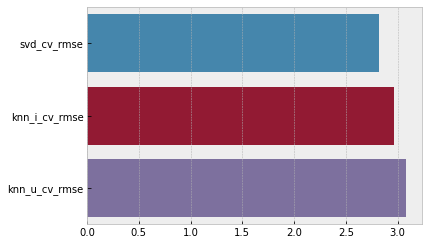

In [49]:
sns.barplot(y=['svd_cv_rmse','knn_i_cv_rmse', 'knn_u_cv_rmse'],
            x=[svd_cv['test_rmse'].mean(),knn_i_cv['test_rmse'].mean(), knn_u_cv['test_rmse'].mean()])

Thus, for cv scores too, knn_i is giving a better performance

# 10. In what business scenario you should use popularity based Recommendation Systems ?

Popularity based recommendation systems can be useful in multiple scenarios like:

1. When there is no data about the user and items.

2. When it is required to show most popular items in different categories along with personalized results like:

Most popular punjabi songs or most popular english songs on a music website/app

Most popular trend in cwestern wear or traditional wear

Most popular holiday packages for honeymoon trips, or bike trips or himalayan trips etc

# 11. In what business scenario you should use CF based Recommendation Systems ? 

Collaborative filtering is useful in scenarios like:

1. Giving personalised recommendation to the user, when user history or item data is available. Some examples can be:

Personalized movie recommendation of movie sites like Netflix, Amazon Prime, Youtube etc

# 12. What other possible methods can you think of which can further improve the recommendation for different users ? 

Other from Popularity and Collaborative Filtering, hybrid recommendation methods like Content+Collaborative method, Demographic, Utility based, and Knowledge based recommendation system can also be used.

# THE END